## Hands-on Activity 9.2 Customized Visualizations using Seaborn

**Name**: Carigo, Naira Jezreel B.

**Section**: CPE22S3

**Instructor**: Engr. Roman Richard

## Data Analysis:

9.4 Introduction to Seaborn
I learned that Seaborn makes creating clean and stylish visualizations much easier, especially when working with DataFrames. It simplifies tasks like creating box plots and histograms, and the default designs already look professional.

9.5 Formatting Plots
This part helped me understand how small changes like adding titles, axis labels, and adjusting tick marks can make graphs more readable and visually appealing. These tweaks make it easier to interpret the data quickly.

9.6 Customizing Visualizations
I explored how to use color palettes, control transparency, and show grid lines to enhance the visual appeal and clarity of data. These customizations help make complex datasets more understandable and the plots more engaging.


## Supplementary Activity:


Using the CSV files provided and what we have learned so far in this module complete the following exercises:


1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

3. Fill in the area between the bounds in the plot from exercise #2.

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
> Disappointing user growth announced after close on July 25, 2018
>
> Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
>
> FTC launches investigation on March 20, 2018
>
>
6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.onth.

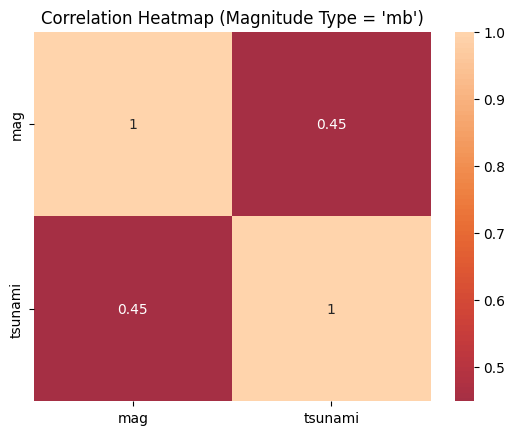

In [5]:
## 1. Heatmap for Correlation (Magnitude & Tsunami with magType 'mb')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

quakes = pd.read_csv('/earthquakes-1.csv')

mb_filter = quakes.query("magType == 'mb'")
correlations = mb_filter[['mag','tsunami']].corr()

sns.heatmap(correlations, annot=True, center=0)
plt.title("Correlation Heatmap (Magnitude Type = 'mb')")
plt.show()


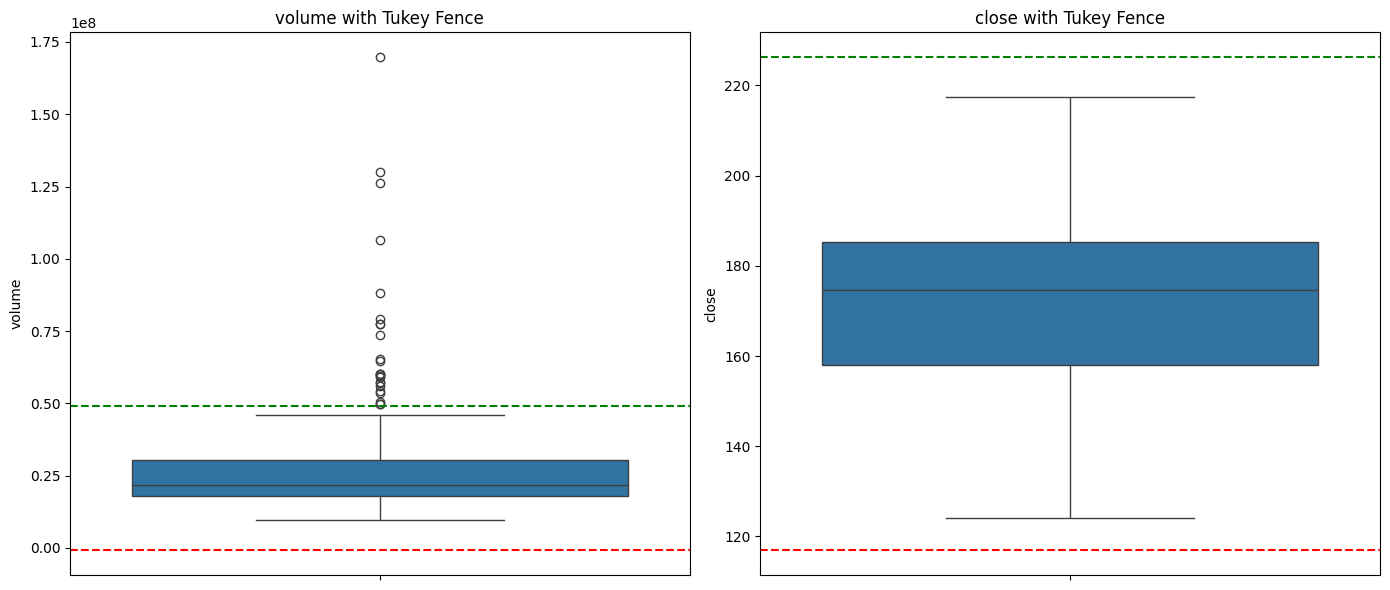

In [6]:
## 2. Boxplot with Tukey Fence for Facebook Volume and Close Price


fb = pd.read_csv('/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, col in enumerate(['volume', 'close']):
    q1 = fb[col].quantile(0.25)
    q3 = fb[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    sns.boxplot(y=fb[col], ax=axes[i])
    axes[i].axhline(lower, color='red', linestyle='--')
    axes[i].axhline(upper, color='green', linestyle='--')
    axes[i].set_title(f'{col} with Tukey Fence')

plt.tight_layout()
plt.show()

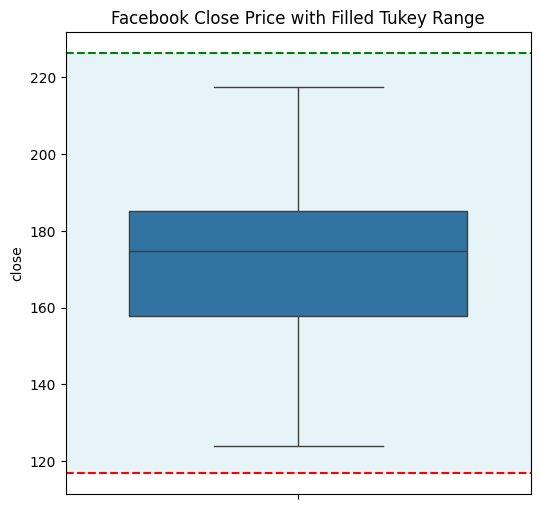

In [7]:
## 3. Fill Area Between Tukey Bounds (Close Price)

fig, ax = plt.subplots(figsize=(6, 6))
col = 'close'

q1 = fb[col].quantile(0.25)
q3 = fb[col].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

sns.boxplot(y=fb[col], ax=ax)
ax.axhline(lower, color='red', linestyle='--')
ax.axhline(upper, color='green', linestyle='--')
ax.fill_betweenx(y=[lower, upper], x1=0, x2=1, color='lightblue', alpha=0.3, transform=ax.get_yaxis_transform())

ax.set_title('Facebook Close Price with Filled Tukey Range')
plt.show()

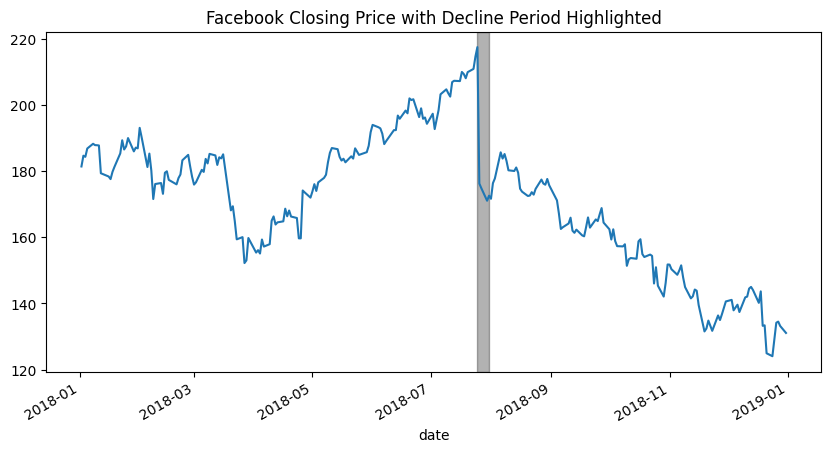

In [8]:
## 4. Highlight Price Drop (July 25–31, 2018)

fig, ax = plt.subplots(figsize=(10, 5))
fb['close'].plot(ax=ax)
ax.axvspan(pd.to_datetime('2018-07-25'), pd.to_datetime('2018-07-31'), color='black', alpha=0.3)
ax.set_title("Facebook Closing Price with Decline Period Highlighted")
plt.show()


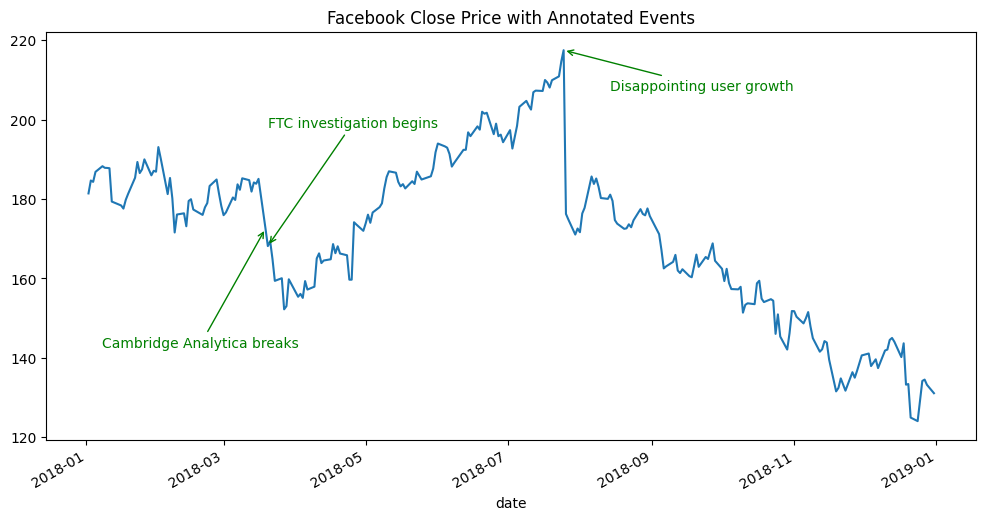

In [9]:
## 5. Annotate 3 Events on Facebook Closing Price Plot

fig, ax = plt.subplots(figsize=(12, 6))

fb['close'].plot(ax=ax)
events = {
    '2018-07-25': 'Disappointing user growth',
    '2018-03-19': 'Cambridge Analytica breaks',
    '2018-03-20': 'FTC investigation begins'
}
offsets = [(20, -10), (-70, -30), (0, 30)]

for (date, label), (dx, dy) in zip(events.items(), offsets):
    x = pd.to_datetime(date)
    y = fb.loc[date, 'close']
    ax.annotate(label, xy=(x, y),
                xytext=(x + pd.Timedelta(days=dx), y + dy),
                arrowprops=dict(arrowstyle="->", color='green'),
                fontsize=10, color='green')

ax.set_title("Facebook Close Price with Annotated Events")
plt.show()

## Reflection:

Through this activity, I gained hands-on experience using Pandas and Matplotlib for data visualization. I learned how to create different types of plots like line graphs, histograms, KDEs, and box plots, which helped me better understand how to interpret and present data clearly. This knowledge is valuable for analyzing real-world datasets and drawing meaningful insights.